<a href="https://colab.research.google.com/github/arshiakauser/Solar-Panel-Defect-Detection/blob/main/Train_Solaryolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
Solar panels can develop several defects—like bird droppings, dust accumulation, physical or electrical damage—that reduce their efficiency.  
The goal of this project is to automatically detect and segment such defects using YOLOv9c-seg.

### Objective
Train a YOLOv9c-seg model on a labeled Roboflow dataset to classify and segment six defect types, improving maintenance workflows and power-output monitoring.

### Classes
1. Bird-drop  
2. Defective  
3. Dusty  
4. Electrical-Damage  
5. Non-Defective  
6. Physical-Damage


⚙️ **2. Environment Setup**

In [1]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # Set locale to UTF-8
!pip install -U ultralytics
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00
Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 35.94 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.0 MB/s eta 0:00:00


In [2]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


📂 **3. Dataset Loading (Roboflow)**

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="jry8EUdtTbZVP8NuVIPg")
project = rf.workspace("solarpaneldamagedetectiongroup2").project("project_212_new")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project_212_New-1 in yolov9:: 100%|██████████| 1454/1454 [00:00<00:00, 5202.04it/s]


In [4]:
import multiprocessing as mp
# Set the multiprocessing start method to 'spawn' to avoid conflicts with JAX or multithreading
mp.set_start_method('spawn', force=True)

**🧠 4. Model Setup and Training**

In [5]:
from ultralytics import YOLO

# Load the model
try:
    model = YOLO('yolov9c-seg.pt') # Make sure to include the file extension .pt
except Exception as e:
    print(f"Error loading model: {e}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Train the model
try:
    model.train(data="/content/yolov9/Project_212_New-1/data.yaml",
                epochs=50,
                imgsz=640,
                patience=10,
                task='segment',
                workers=0)
except Exception as e:
    print(f"Training error: {e}")

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolov9/Project_212_New-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9c-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, 

**✅ 5. Validation and Evaluation**

In [7]:
# Evaluate model on validation set
val_results = model.val(split = 'val')
print("validation result: ", val_results)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c-seg summary (fused): 169 layers, 27,629,154 parameters, 0 gradients, 157.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2140.0±432.8 MB/s, size: 76.5 KB)
val: Scanning /content/yolov9/Project_212_New-1/valid/labels.cache... 146 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 146/146 283.9Kit/s 0.0s
val: /content/yolov9/Project_212_New-1/valid/images/Clean_34_jpg.rf.d7cca43f51d50dd455e9e0370a922e00.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 0.7it/s 13.6s
                   all        146       1632      0.729      0.694      0.723      0.545      0.713      0.668      0.699      0.465
             Bird-drop         16        229      0.485      0.387      0.381      0.189      0.441      0.336      0.311      0.113
             Defective

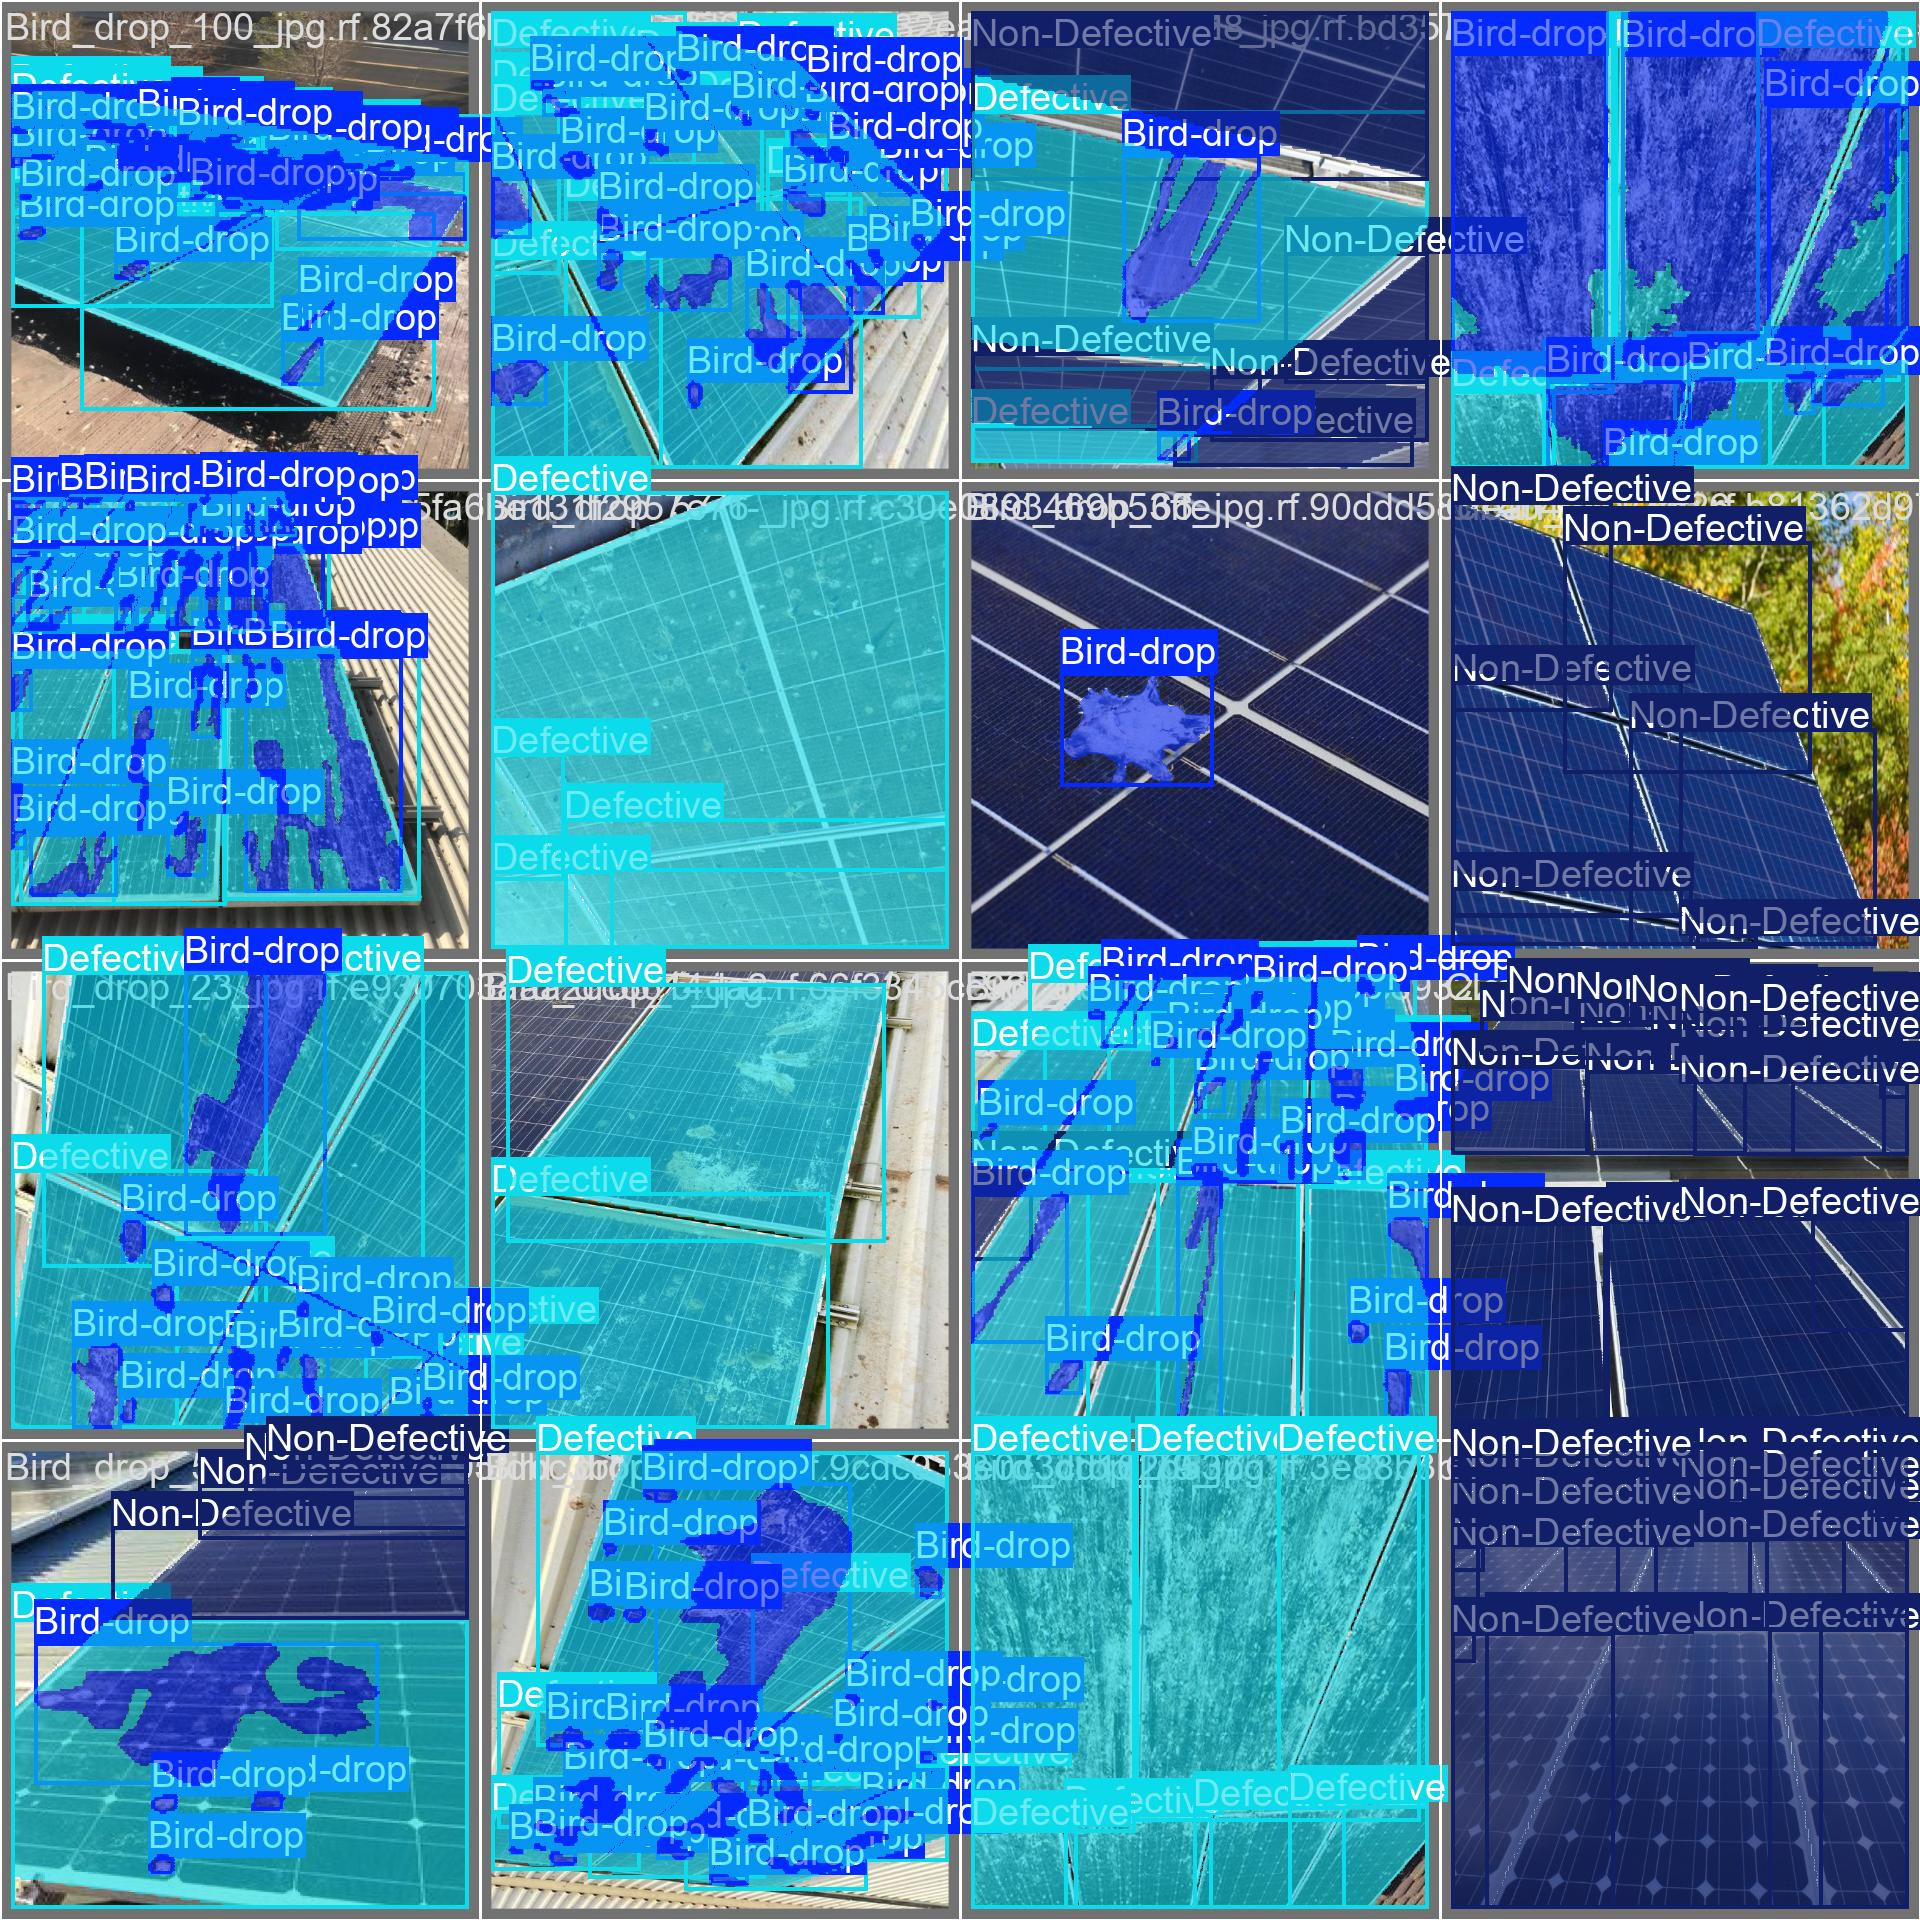

In [8]:
from IPython.display import Image

Image(filename=f'/content/yolov9/runs/segment/val/val_batch0_labels.jpg', width=800)

**🔍 6. Inference and Visualization**

In [9]:
# Evaluate on the test set
test_results = model.val(split='test')
print("Test Results:", test_results)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 18.0±8.4 MB/s, size: 78.4 KB)
val: Scanning /content/yolov9/Project_212_New-1/test/labels... 74 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 74/74 508.9it/s 0.1s
val: New cache created: /content/yolov9/Project_212_New-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 0.6it/s 8.6s
                   all         74        817      0.786      0.715      0.776      0.583      0.779      0.689      0.736      0.501
             Bird-drop          6        145      0.708      0.414        0.5      0.265      0.706        0.4      0.437      0.215
             Defective         37         61      0.829      0.852      0.907      0.834      0.775      0.787      0.819       0.63
                 Dusty         12        111      0.78

**🧾 Results Summary**

After training the YOLOv9c-seg model on the custom Solar Panel Defect Detection dataset from Roboflow
, the model achieved the following performance metrics:

|Metric | Bounding Box (B) | Segmentation Mask (M) |
|-------|------------------|-----------------------|
| Precision | 0.786 | 0.779 |
| Recall | 0.715 | 0.689 |
| mAP@50 | 0.776 | 0.736 |
|mAP@50–95	| 0.583 | 0.501 |

**✅ Interpretation**

The YOLOv9c-seg model demonstrates strong detection and segmentation accuracy across all six defect classes:
Bird-drop, Defective, Dusty, Electrical-Damage, Non-Defective, and Physical-Damage.

The Precision–Recall tradeoff shows a good balance between false positives and missed detections.

**💡 Next Steps**

Fine-tune using YOLOv9e-seg or a custom anchor configuration to improve mAP@50–95.

Apply Roboflow augmentations for lighting variations, rotations, and dust occlusions.

Deploy as an interactive web app using Streamlit or Flask + ONNX Runtime.


image 1/1 /content/yolov9/Project_212_New-1/test/images/Bird_drop_1_jpg.rf.384f6dcdcfee155c9f091690c234518e.jpg: 640x640 58 Bird-drops, 6 Defectives, 1 Dusty, 58.6ms
Speed: 1.9ms preprocess, 58.6ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)


array([[[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[235, 219,  11],
        [235, 219,  11],
        [235, 219,  11],
        ...,
        [212, 197,  54],
        [235, 219,  11],
        [235, 219,  11]],

       ...,

       [[200, 228, 235],
        [200, 228, 235],
        [198, 226, 233],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[193, 221, 228],
        [194, 222, 229],
        [193, 221, 228],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]],

       [[184, 212, 219],
        [186, 214, 221],
        [187, 215, 222],
        ...,
        [235, 219,  11],
        [235, 219,  11],
        [235, 219,  11]]], dtype=uint8)
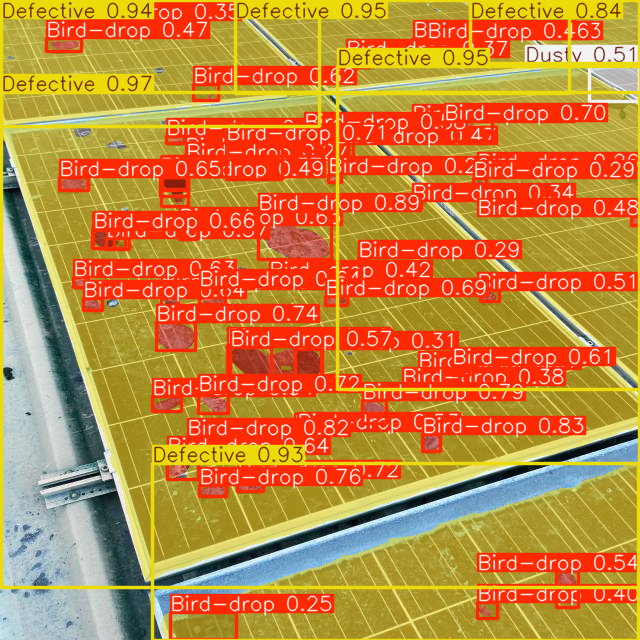

In [10]:
# Visualize example result
results = model.predict('/content/yolov9/Project_212_New-1/test/images/Bird_drop_1_jpg.rf.384f6dcdcfee155c9f091690c234518e.jpg')
results[0].plot()

This image illustrate how the YOLOv9c-seg model performs defect detection and segmentation on solar panel sample.

**📊 7. Conclusion**

The YOLOv9c-seg model successfully detects and segments six classes of solar panel defects.
It can help automate maintenance inspections by identifying faulty panels early, saving both time and energy costs.